In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# Download VarScan
!curl -L https://sourceforge.net/projects/varscan/files/VarScan.v2.3.9.jar/download > VarScan.jar

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   593    0   593    0     0   3021      0 --:--:-- --:--:-- --:--:--  3025
100   347  100   347    0     0   1275      0 --:--:-- --:--:-- --:--:--  1275
100  108k  100  108k    0     0    98k      0  0:00:01  0:00:01 --:--:--  745k


In [52]:
# Run mpileup2snp
!java -jar VarScan.jar mpileup2snp ../example_files/NA12878_child.mpileup --min-var-frequency 0.2 --min-freq-for-hom 0.8 --min-coverage 10 --min-avg-qual 0 --strand-filter 0 --output-vcf 1 --variants 1 > varscan_child.vcf

Only SNPs will be reported
Min coverage:	10
Min reads2:	2
Min var freq:	0.2
Min avg qual:	0
P-value thresh:	0.01
Reading input from ../example_files/NA12878_child.mpileup
202362 bases in pileup file
46 variant positions (40 SNP, 6 indel)
0 were failed by the strand-filter
40 variant positions reported (40 SNP, 0 indel)


In [12]:
# Run snpfinder
!snpfinder ../example_files/NA12878_child.mpileup -o snpfinder_child.vcf

In [13]:
# Time mpile2snp
!time java -jar VarScan.jar mpileup2snp ../example_files/NA12878_child.mpileup --min-var-frequency 0.2 --min-freq-for-hom 0.8 --min-coverage 10 --min-avg-qual 0 --strand-filter 0 --output-vcf 1 --variants 1 > varscan_child.vcf

Only SNPs will be reported
Min coverage:	10
Min reads2:	2
Min var freq:	0.2
Min avg qual:	0
P-value thresh:	0.01
Reading input from ../example_files/NA12878_child.mpileup
202362 bases in pileup file
46 variant positions (40 SNP, 6 indel)
0 were failed by the strand-filter
40 variant positions reported (40 SNP, 0 indel)
java -jar VarScan.jar mpileup2snp ../example_files/NA12878_child.mpileup  0.2  23.95s user 0.89s system 130% cpu 19.073 total


In [14]:
# Time snpfinder
!time snpfinder ../example_files/NA12878_child.mpileup -o snpfinder_child.vcf

snpfinder ../example_files/NA12878_child.mpileup -o snpfinder_child.vcf  1.25s user 0.02s system 68% cpu 1.859 total


In [54]:
# Time mpileup2snp at different sizes of mpileup
!time java -jar VarScan.jar mpileup2snp ./scaling/child_chunk_100.mpileup --min-var-frequency 0.2 --min-freq-for-hom 0.8 --min-coverage 10 --min-avg-qual 0 --strand-filter 0 --output-vcf 1 --variants 1 > ./scaling/varscan_child_chunk_100.vcf
!time java -jar VarScan.jar mpileup2snp ./scaling/child_chunk_1000.mpileup --min-var-frequency 0.2 --min-freq-for-hom 0.8 --min-coverage 10 --min-avg-qual 0 --strand-filter 0 --output-vcf 1 --variants 1 > ./scaling/varscan_child_chunk_1000.vcf
!time java -jar VarScan.jar mpileup2snp ./scaling/child_chunk_10000.mpileup --min-var-frequency 0.2 --min-freq-for-hom 0.8 --min-coverage 10 --min-avg-qual 0 --strand-filter 0 --output-vcf 1 --variants 1 > ./scaling/varscan_child_chunk_10000.vcf
!time java -jar VarScan.jar mpileup2snp ./scaling/child_chunk_50000.mpileup --min-var-frequency 0.2 --min-freq-for-hom 0.8 --min-coverage 10 --min-avg-qual 0 --strand-filter 0 --output-vcf 1 --variants 1 > ./scaling/varscan_child_chunk_50000.vcf
!time java -jar VarScan.jar mpileup2snp ./scaling/child_chunk_100000.mpileup --min-var-frequency 0.2 --min-freq-for-hom 0.8 --min-coverage 10 --min-avg-qual 0 --strand-filter 0 --output-vcf 1 --variants 1 > ./scaling/varscan_child_chunk_100000.vcf

Only SNPs will be reported
Min coverage:	10
Min reads2:	2
Min var freq:	0.2
Min avg qual:	0
P-value thresh:	0.01
Reading input from ./scaling/child_chunk_100.mpileup
100 bases in pileup file
2 variant positions (2 SNP, 0 indel)
0 were failed by the strand-filter
2 variant positions reported (2 SNP, 0 indel)
java -jar VarScan.jar mpileup2snp ./scaling/child_chunk_100.mpileup  0.2  0.8  0.31s user 0.10s system 92% cpu 0.447 total
Only SNPs will be reported
Min coverage:	10
Min reads2:	2
Min var freq:	0.2
Min avg qual:	0
P-value thresh:	0.01
Reading input from ./scaling/child_chunk_1000.mpileup
1000 bases in pileup file
20 variant positions (20 SNP, 0 indel)
0 were failed by the strand-filter
20 variant positions reported (20 SNP, 0 indel)
java -jar VarScan.jar mpileup2snp ./scaling/child_chunk_1000.mpileup  0.2  0.  0.71s user 0.10s system 163% cpu 0.496 total
Only SNPs will be reported
Min coverage:	10
Min reads2:	2
Min var freq:	0.2
Min avg qual:	0
P-value thresh:	0.01
Reading input fr

In [55]:
# Add together time for each command
var_100 = .31+.1
var_1000 = .71+.1
var_10000 = 1.88+.15
var_50000 = 4.46+.27
var_100000 = 18.88+.44

In [47]:
# Time snpfinder at different sizes of mpileup
!time snpfinder ./scaling/child_chunk_100.mpileup -o ./scaling/snpfinder_child_chunk_100.vcf
!time snpfinder ./scaling/child_chunk_1000.mpileup -o ./scaling/snpfinder_child_chunk_1000.vcf
!time snpfinder ./scaling/child_chunk_10000.mpileup -o ./scaling/snpfinder_child_chunk_10000.vcf
!time snpfinder ./scaling/child_chunk_50000.mpileup -o ./scaling/snpfinder_child_chunk_50000.vcf
!time snpfinder ./scaling/child_chunk_100000.mpileup -o ./scaling/snpfinder_child_chunk_100000.vcf

snpfinder ./scaling/child_chunk_100.mpileup -o   0.04s user 0.01s system 66% cpu 0.080 total
snpfinder ./scaling/child_chunk_1000.mpileup -o   0.04s user 0.01s system 96% cpu 0.054 total
snpfinder ./scaling/child_chunk_10000.mpileup -o   0.09s user 0.01s system 96% cpu 0.103 total
snpfinder ./scaling/child_chunk_50000.mpileup -o   0.31s user 0.01s system 98% cpu 0.330 total
snpfinder ./scaling/child_chunk_100000.mpileup -o   0.58s user 0.01s system 97% cpu 0.610 total


In [56]:
# Add together time for each command
snp_100 = 0.04+0.01
snp_1000 = 0.04+0.01
snp_10000 = 0.09+0.01
snp_50000 = 0.31+0.01
snp_100000 = 0.58+0.01

In [58]:
# Put scaling data into a df
data = {
    'mpileup size (# of lines)': [100, 1000, 10000, 50000, 100000],
    'snpfinder': [snp_100, snp_1000, snp_10000, snp_50000, snp_100000],
    'mpileup2snp': [var_100, var_1000, var_10000, var_50000, var_100000]
}

df = pd.DataFrame(data)
print(df)

   mpileup size (# of lines)  snpfinder  mpileup2snp
0                        100       0.05         0.41
1                       1000       0.05         0.81
2                      10000       0.10         2.03
3                      50000       0.32         4.73
4                     100000       0.59        19.32


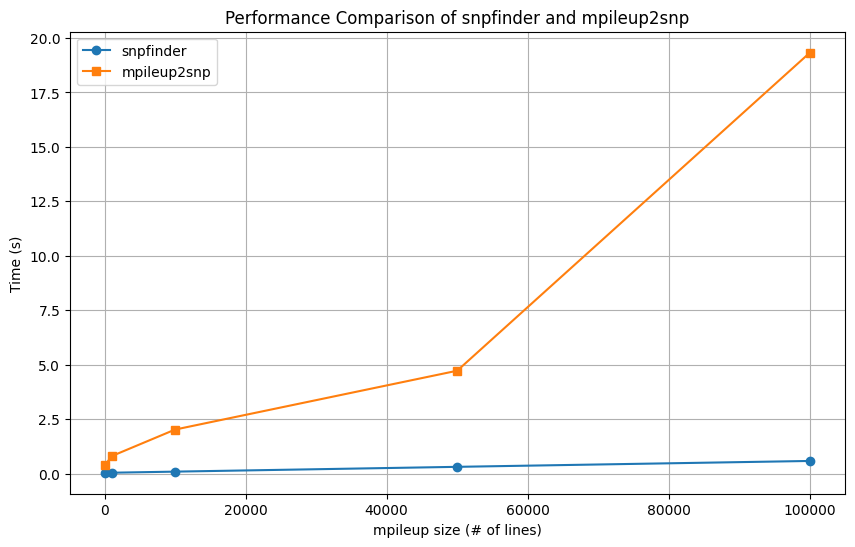

In [65]:
# Plot df
plt.figure(figsize=(10, 6))
plt.plot(df['mpileup size (# of lines)'], df['snpfinder'], marker='o', label='snpfinder')
plt.plot(df['mpileup size (# of lines)'], df['mpileup2snp'], marker='s', label='mpileup2snp')
plt.xlabel('mpileup size (# of lines)')
plt.ylabel('Time (s)')
plt.title('Performance Comparison of snpfinder and mpileup2snp')
plt.legend()
plt.grid(True)
plt.savefig('scaling.png')